In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [3]:
bankds = pd.read_csv("bank-full.csv",sep=";", thousands=',')
bankds.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
print("bankds shape:",bankds.shape)
print("========================================")
print("bankds info:",bankds.info())
print("========================================")
print("bankds describe:\n", bankds.describe())
print("========================================")
print("missing values in bankds:\n",bankds.isnull().sum())
     

bankds shape: (45211, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
bankds info: None
bankds describe:
                 age        balance   

In [5]:
#Encoding the categorical variable
bank = pd.get_dummies(bankds,columns=['job','marital','education','contact','poutcome','month'])
bank

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,no,2143,yes,no,5,261,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
1,44,no,29,yes,no,5,151,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
2,33,no,2,yes,yes,5,76,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
3,47,no,1506,yes,no,5,92,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
4,33,no,1,no,no,5,198,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,977,3,-1,0,...,False,False,False,False,False,False,False,True,False,False
45207,71,no,1729,no,no,17,456,2,-1,0,...,False,False,False,False,False,False,False,True,False,False
45208,72,no,5715,no,no,17,1127,5,184,3,...,False,False,False,False,False,False,False,True,False,False
45209,57,no,668,no,no,17,508,4,-1,0,...,False,False,False,False,False,False,False,True,False,False


In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   default              45211 non-null  object
 2   balance              45211 non-null  int64 
 3   housing              45211 non-null  object
 4   loan                 45211 non-null  object
 5   day                  45211 non-null  int64 
 6   duration             45211 non-null  int64 
 7   campaign             45211 non-null  int64 
 8   pdays                45211 non-null  int64 
 9   previous             45211 non-null  int64 
 10  y                    45211 non-null  object
 11  job_admin.           45211 non-null  bool  
 12  job_blue-collar      45211 non-null  bool  
 13  job_entrepreneur     45211 non-null  bool  
 14  job_housemaid        45211 non-null  bool  
 15  job_management       45211 non-null  bool  
 16  job_

In [7]:
# Change columns default, housing,loan categorical variable to numerical variable.
bank[['default','housing','loan','y']] = bank[['default','housing','loan','y']].replace(['yes','no'],['1','0'])

In [8]:
bank

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
1,44,0,29,1,0,5,151,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
2,33,0,2,1,1,5,76,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
3,47,0,1506,1,0,5,92,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
4,33,0,1,0,0,5,198,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,False,False,False,False,False,False,False,True,False,False
45207,71,0,1729,0,0,17,456,2,-1,0,...,False,False,False,False,False,False,False,True,False,False
45208,72,0,5715,0,0,17,1127,5,184,3,...,False,False,False,False,False,False,False,True,False,False
45209,57,0,668,0,0,17,508,4,-1,0,...,False,False,False,False,False,False,False,True,False,False


In [9]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   default              45211 non-null  object
 2   balance              45211 non-null  int64 
 3   housing              45211 non-null  object
 4   loan                 45211 non-null  object
 5   day                  45211 non-null  int64 
 6   duration             45211 non-null  int64 
 7   campaign             45211 non-null  int64 
 8   pdays                45211 non-null  int64 
 9   previous             45211 non-null  int64 
 10  y                    45211 non-null  object
 11  job_admin.           45211 non-null  bool  
 12  job_blue-collar      45211 non-null  bool  
 13  job_entrepreneur     45211 non-null  bool  
 14  job_housemaid        45211 non-null  bool  
 15  job_management       45211 non-null  bool  
 16  job_

### Model Building

In [10]:
Y = bank['y']
X = pd.concat([bank.iloc[:,0:10], bank.iloc[:,11:]],axis=1)
X.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
1,44,0,29,1,0,5,151,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
2,33,0,2,1,1,5,76,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
3,47,0,1506,1,0,5,92,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
4,33,0,1,0,0,5,198,1,-1,0,...,False,False,False,False,False,False,True,False,False,False


In [11]:
logreg = LogisticRegression(solver='lbfgs', max_iter=5000)

In [12]:
#Model fitting()
logreg.fit(X,Y)
# Bo
print("Intercept value: ",logreg.intercept_)
# B1
print("coeffcient value: ",logreg.coef_)

Intercept value:  [-0.87578546]
coeffcient value:  [[-6.80245825e-03 -7.28273688e-02  1.23709177e-05 -6.96792253e-01
  -4.65757363e-01  3.30360223e-03  4.11656815e-03 -8.00703587e-02
  -6.03184782e-04  1.14006327e-02  1.54345986e-02 -2.27457392e-01
  -2.66415409e-01 -3.06109655e-01 -6.65253065e-02  4.40860189e-01
  -2.40796161e-01 -2.38714092e-01  3.46632512e-01 -1.13817688e-01
  -1.40209977e-01 -7.14014261e-02 -2.89021409e-01 -3.49454676e-01
  -2.30043720e-01 -4.58669026e-01 -2.58313160e-01 -1.33507410e-02
  -1.38186879e-01  3.22308314e-01  9.19755927e-02 -1.28280371e+00
  -8.30861766e-01 -5.96053745e-01  1.57912258e+00 -1.02072687e+00
   2.79644599e-02 -7.83546024e-01  2.83341327e-01 -2.65268022e-01
  -9.37816531e-01 -8.27973602e-01  3.55826634e-01  1.18297763e+00
  -4.37274686e-01 -9.65232201e-01  8.23901411e-01  6.74579792e-01]]


### Model Prediction

In [13]:
Y_pred = logreg.predict(X)
Y_pred

array(['0', '0', '0', ..., '1', '0', '0'], dtype=object)

In [14]:
y_pred_df=pd.DataFrame({'actual_y':Y,'y_pred_prob':Y_pred})
y_pred_df

,actual_y,y_pred_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
CM = confusion_matrix(Y,Y_pred)
CM

array([[38952,   970],
       [ 3464,  1825]], dtype=int64)

In [16]:
ac = accuracy_score(Y,Y_pred)
print("Accuracy score: ", ac.round(2))

Accuracy score:  0.9


In [17]:
# As accuracy = 0.8933, which is greater than 0.5; Thus [:,1] Threshold value>0.5=1 else [:,0] Threshold value<0.5=0 
logreg.predict_proba(X)[:,1] 

array([0.01631421, 0.00941628, 0.00358334, ..., 0.97570349, 0.1037002 ,
       0.14066551])

In [18]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

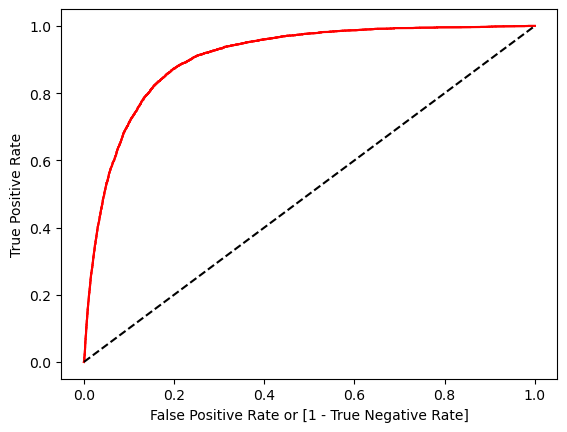

Area under curve score: 0.6603791981241849


In [19]:
# ROC Curve plotting and finding Accuracy value
fpr,tpr,thresholds=roc_curve(Y,logreg.predict_proba(X)[:,1],pos_label='1')
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(Y,Y_pred)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('Area under curve score:',auc)